In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from numpy.random import randn, seed

# Introducción

Una muestra de datos es una instantánea de una población más amplia, de todas las observaciones que podrían tomarse de un dominio o en la generación de un proceso.
Curiosamente, muchas de las observaciones que vemos en la vida real de forma recurrente siguen un patrón llamada distribución normal, o más formalmente, distribución Gaussiana.

# Distribución Gaussiana

Una distribución de datos hace referencia a la forma que toman dichos datos cuando son representados. La distribución de valores continuos más común, es la conocida curva de la campana. Esta distribución también es conocida como distribución normal, ya que en su interior caen una gran cantidad de datos. Es también conocida como distribución gaussiana. Algunas de las observaciones que siguen una distribución gaussiana son:

* El peso de las personas.

* Temperatura coorporal.

* Test de inteligencia.

Python dispone de la función **norm**, donde le indicamos la media y la varianza y dicha función nos genera una distribución normal (ideal) con la media y la varianza indicadas.

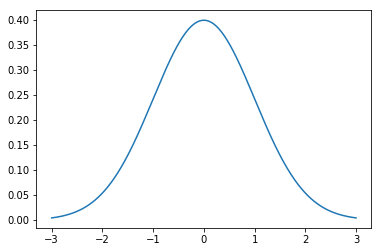

In [2]:
#Generamos el eje x de nuestra distribución
x_axis = np.arange(-3, 3, 0.001)

#Generamos una distribución normal de media cero y varianza igual a la unidad 
y_axis = norm.pdf(x_axis, 0, 1)

#Vemos el resultado
plt.plot(x_axis, y_axis)
plt.show()

Podemos ver como este ejemplo genera un distribución gaussiana ideal, donde en el eje x tenemos la variale y en el eje y lo que tenemos es la probabilidad para cada observación. De forma que las observaciones alrededor de cero son las observaciones más probables y las observaciones en los extremos (3 y -3) son las menos probables. Técnicamente esta función se le conoce como función densidad de probabilidad y se estudiará con más detalle más adelante.

Es de gran ayuda cuando los datos siguen una distribucióon gaussiana ó cuando podemos asumir una distribución gaussiana  a la hora de calcular estadísticos. Esto se debe a que la distribución gaussiana es altamente interpretable. No todas las distribuciones son gaussianas y es muy importante hacer una distinción cuando esto no sucede, esto se debe a que muchos tests estadísticos como veremos más adelate asumen normalidad en los datos. 

Algunos ejemplos en las que las observaciones no siguen una distribución gaussiana son:

* El sueldo de las personas

* Población de las ciudades

* Ventas de libros

Otra distribución muy común es la distribución uniforme, a menudo podemos ver que todos los items o valores de una muestra tienen la misma probabilidad de ser seleccionados. La forma de la función de distribución de este tipo de datos es una línea recta.

# Muestra vs Población

Podemos pensar que los datos son generados por procesos desconocidos. Los datos que recolectamos son llamados muestras de datos, mientras que todos los datos que podrían ser recolectados son llamados población.

* **Muestra de datos:** un subconjunto de observaciones de un grupo.

* **Población de datos:** todas las posibles observaciones de un grupo.

Esta es una distinción muy importante ya que los métodos estadísticos utilizados varían en función de si trabajamos con una muestra o una población. En el caso del aprendizaje automático, muy a menudo se trabaja con muestras de datos.

# Conjunto de datos de prueba

Antes de comenzar a realizar un análisis de los estadísticos más importantes a la hora de trabajar con distribuciones Gaussianas, vamos a generar una muestra de prueba para trabajar con ella. Podemos hacer uso de la función **randn()** para generar una muestra de números aleatorios. Existen dos parámetros claves a la hora de generar cualquier distribución Gaussiana, la media y la desviación estándar.
La función **randn()** genera un número determinado de números aleatorios extraídos de una distribución gaussiana de media cero y desviación estándar igual a la unidad. Podemos agregar la media deseada sin más que agregar un valor a nuestra muestra y una desviación estándar deseada sin más que multiplicar por el factor deseado.

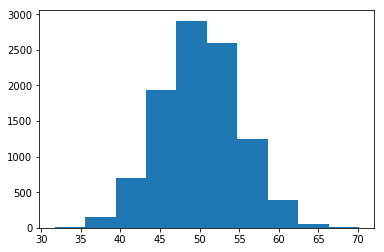

In [6]:
#Fijamos la semilla generadora
seed(1)

#Generamos nuestra muestra de datos
data = 5 * randn(10000) + 50

#Vemos el histograma de nuestros datos
plt.hist(data)
plt.show()

Podemos observar como nuestros presentan una distribución aproximádamente gaussiana. Es decir, en determinadas ocasiones nuestros datos aunque no presenten una distribución gaussiana perfecta, podemos asumir como si estos tuviesen una distribución gaussiana.

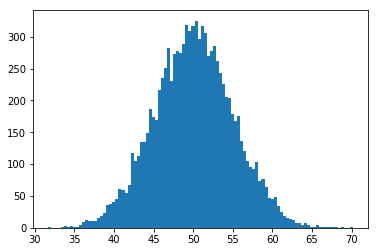

In [7]:
plt.hist(data, bins = 100)
plt.show()

# Tendencia Central

La tendencia central de una distribución se refiere al medio o al valor más típico en una distribución. El valor más común o el más probable. En una distribución Gaussiana la tendencia central se le conoce como la media, o más formalmente como la media aritmética, y es uno de los dos parámetros principales que definen una distribución Gaussiana. La media aritmética de una muestra es calculada como la suma de las observaciones dividida por el número total de observaciones de la muestra

$$ x^{-} =\frac{1}{n} \sum_{i = 1}^nx_{i}$$

Podemos hacer uso de la función **mean()** para calcular la media de una muestra de datos.

In [11]:
#Calculamos la media
result = np.mean(data)
print('Mean: %.3f ' % result)

Mean: 50.049 


El cálculo de la media aritmética de una muestra es un estimación de los parámetros que subyacen a la distribución de la población de la cual hemos extraído la muestra. Aunque sabemos que nuestra media es 50, podemos ver que con un total de 10000 muestras tenemos un valor bastante preciso.

La media se trata de una métrica que se ve muy influida por valores raros (outliers), es decir, valores que se alejan mucho de la media. Es por esto, que en determinadas ocasiones se trata de un valor que puede resultar engañoso.

Calcular la media en otras distribuciones, como una distribución uniforme o una distribución cuadrática, puede que carezca de sentido, ya que aunque el valor puede calcularse, se referirá a un valor arbitrario esperado en lugar de a la verdadera tendencia central.

En el caso de existencia de outliers o de distribuciones no Gaussianas, una alternativa que comunmente es usada como tendencia central alternativa es la mediana.

La mediana se calcula primero ordenando los datos y localizando el valor central. En el caso de que el número de elementos sea par, la mediana se calcula como  el promedio de los dos valores centrales.

Podemos calcular la mediana de una muestra a partir de la función **median()**.

In [12]:
#Calculamos la mediana
result = np.median(data)
print('Median %.3f ' % result )

Median 50.042 


Podemos ver que en este caso los valores son muy similares, esto ocurre siempre que nuestra distribución sea Gaussiana, pero podemos tener situaciones en las que la media y la mediana sean valores realmente diferentes.

# Varianza

La varianza de una distribución hace referencia en como en promedio las observaciones varían o difieren del valor medio. Es útil pensar que la varianza es una medida que mide la separación de una distribución.

Una varianza baja significará que la distribución tiene valores agrupados alrededor de la media, mientras que una varianza elevada indicará que tenemos valores separados de la media.

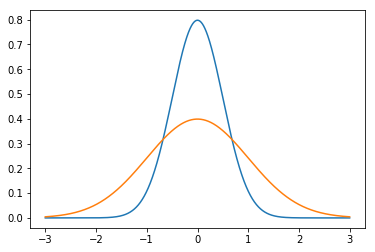

In [13]:
#Generamos dos distribuciones normales
x_axis = np.arange(-3, 3, 0.001)

#Generamos una primera distribución con media cero y varianza 0.5
plt.plot(x_axis, norm.pdf(x_axis, 0, 0.5))
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

La varianza de una muestra de datos se calcula como: 

$$s^2 = \frac{1}{n-1}\sum_{i = 1}^n(x_{i} - mean(x))$$

Esta ecuación puede ser vista sin el -1 en el denominador, este sería el cálculo de la varianza para una población y no una muestra. Podemos hacer uso de la función **var()** para calcular la varianza de una distribución.

In [21]:
#Generamos una distribución 
data = 5 * randn(10000) + 50

#Calculamos la varianza
result = np.var(data, ddof = 1)
print('Var %.3f' % result)

Var 25.136


La interpretación de la varianza puede resultar confusa y complicada ya que las unidades se encuentran elevadas al cuadrado. A menudo, cuando se resume la separación de valores de una distribución gaussiana, se hace uso de la raíz cuadrada de la varianza. Este valor es conocido como la desviación estándar.

La desviación estándar junto con la media, son las dos medidas fundamentales y requeridas para especificar una distribución Gaussiana.

$$\sigma = \sqrt{s^{2}}$$

Podemos calcular la desviación estándar de una muestra haciendo uso de la función **std()**.

In [20]:
#Calculamos la desviación estándar 
desv = np.std(data, ddof = 1)
print('std %.3f' % desv)

std 4.980


Las medidas de varianza pueden ser calculadas para distribuciones no Gaussianas, pero generalmente requieren que la distribución sea identificada, para poder calcular una medida específica de varianza para dicha distribución.

# Describiendo una Gaussiana

En el machine learning aplicado, a menudo tendremos que reportar los resultados de nuestro algoritmo. Es decir, un reporte de las abilidades de nuestro modelo para estimar la variables a predecir. Es muy común dar como medida la media de nuestra métrica, tras realizar un proceso iterativo como puede ser k-fold.

CUando reportamos esto lo que realmente estamos reportando es la distribución de nuestras métrica, estas muy probablemente seguirán una distribución Gaussiana.

Es muy común dar como medida solo la media. Esto podría ocultar otros detalles importantes de nuestra distribución. Un buen reporte debería venir acompañado de la media, la desviación y el número de observaciones de nuestra muestra.

También se debería comprobar si nuestras puntuaciones tiene una distribución Gaussiana o lo suficientemente Gaussiana para defender los parámetros de la distribución Gaussiana.